In [1]:
import numpy as np
import pylab as plt

import pyuvsim
import time
import healpy as hp

import sys
sys.path.append("/home/phil/hera/Hydra") # change this
import hydra

In [2]:
# Antenna array
ants = {0: (0., 0., 0.),
        1: (14., 0., 0.)}

# Beams
beams = [pyuvsim.AnalyticBeam('airy', diameter=8.) for ant in ants]

In [3]:
lsts = np.linspace(0., 1., 100)

In [4]:
t0 = time.time()
ell, m, vis_alm16 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=16, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took  0.287 sec


In [5]:
t0 = time.time()
ell, m, vis_alm32 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=32, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took  1.092 sec


In [6]:
t0 = time.time()
ell, m, vis_alm64 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=64, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took  3.759 sec


In [7]:
t0 = time.time()
ell, m, vis_alm128 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=128, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took 14.036 sec


In [21]:
t0 = time.time()
ell, m, vis_alm256 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=256, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took 58.646 sec


In [23]:
t0 = time.time()
ell, m, vis_alm512 = hydra.vis_simulator.simulate_vis_per_alm(lmax=4, 
                                                           nside=512, 
                                                           ants=ants, 
                                                           freqs=[100e6,], 
                                                           lsts=lsts, 
                                                           beams=beams)
print("Run took %6.3f sec" % (time.time() - t0))

Run took 246.430 sec


In [8]:
ell.size

15

In [9]:
# First index is the real part, second is the imaginary part of a_lm
for i in range(ell.size):
    print("%d / %d: (%d, %d)" % (i, i+ell.size, ell[i], m[i]))

0 / 15: (0, 0)
1 / 16: (1, 0)
2 / 17: (2, 0)
3 / 18: (3, 0)
4 / 19: (4, 0)
5 / 20: (1, 1)
6 / 21: (2, 1)
7 / 22: (3, 1)
8 / 23: (4, 1)
9 / 24: (2, 2)
10 / 25: (3, 2)
11 / 26: (4, 2)
12 / 27: (3, 3)
13 / 28: (4, 3)
14 / 29: (4, 4)


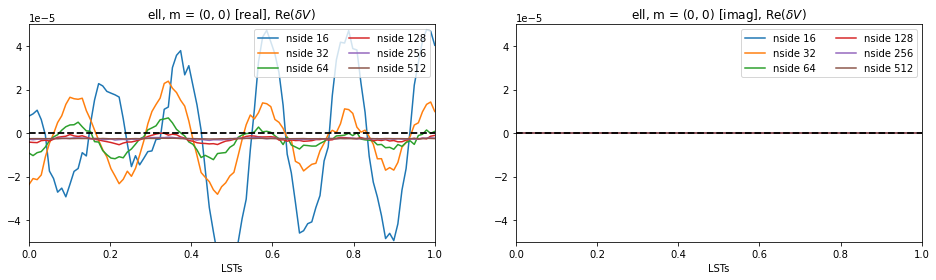

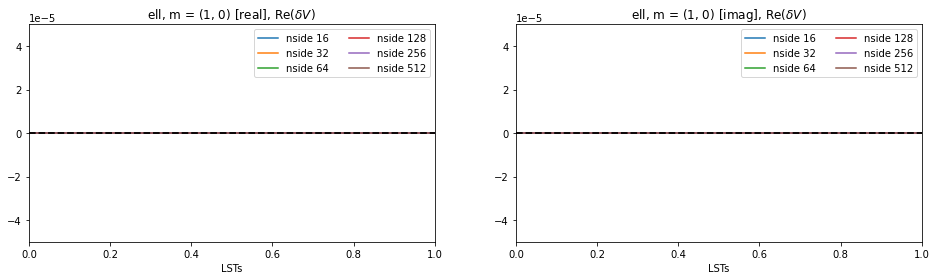

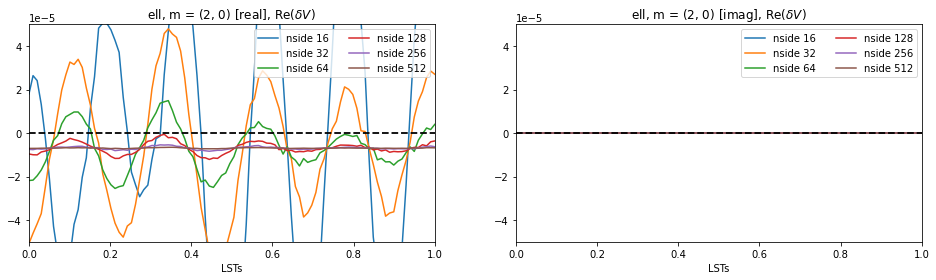

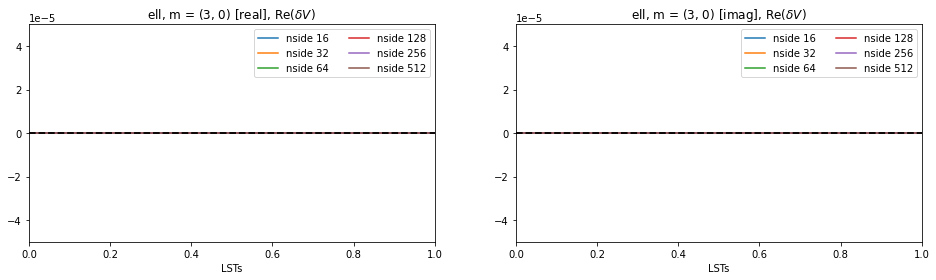

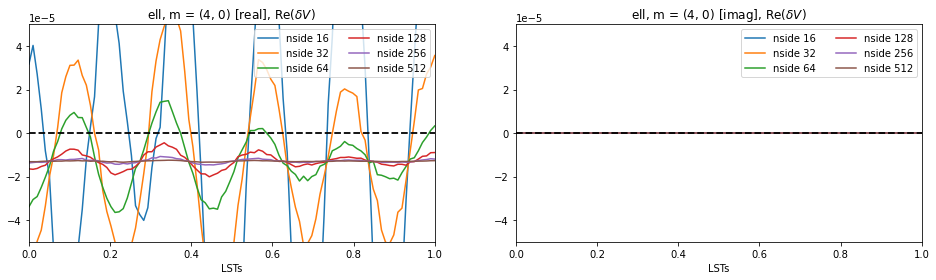

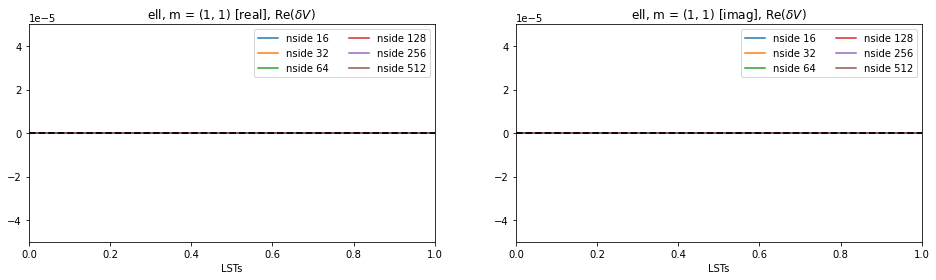

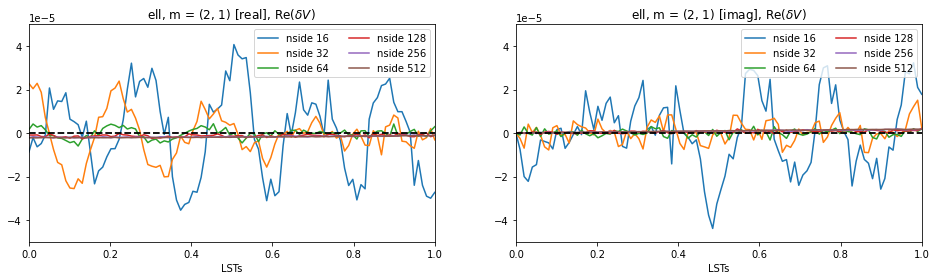

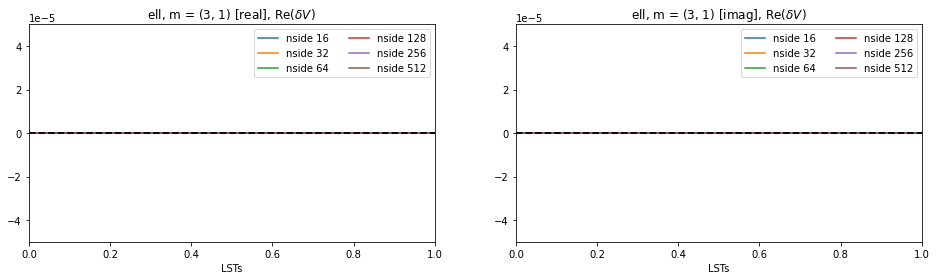

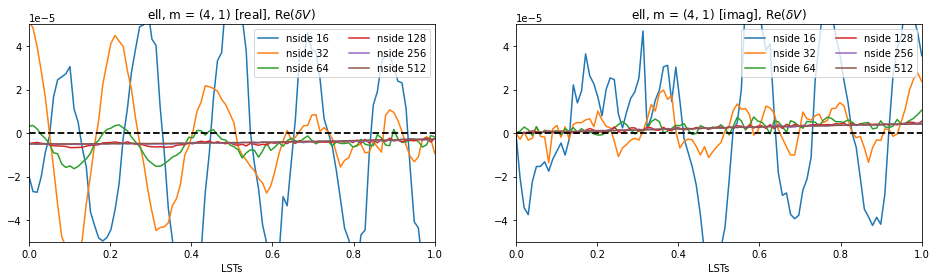

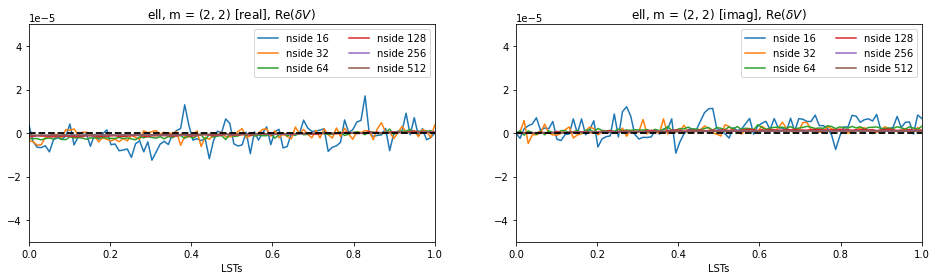

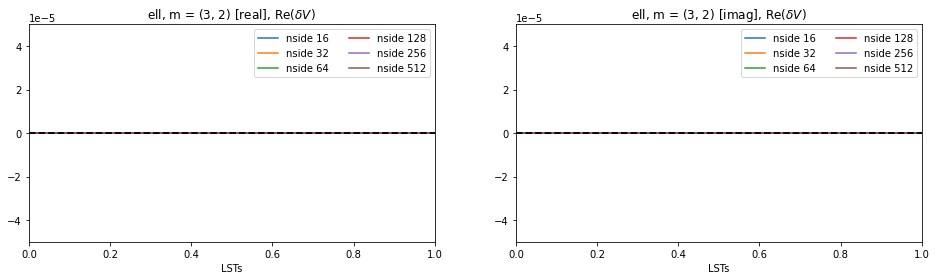

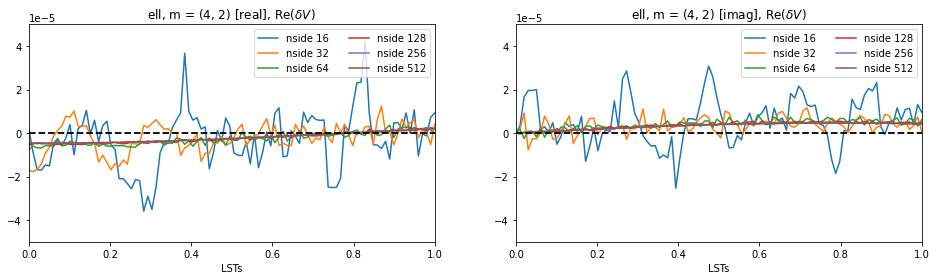

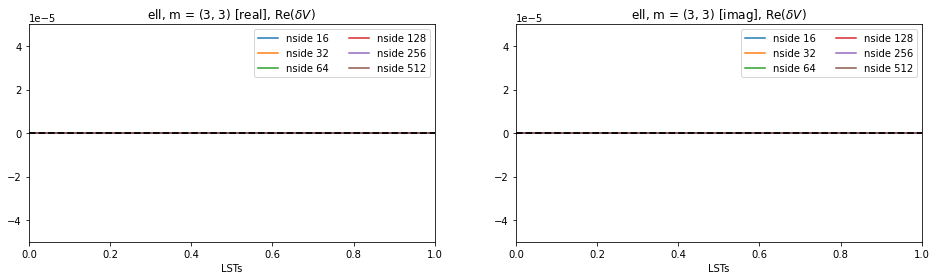

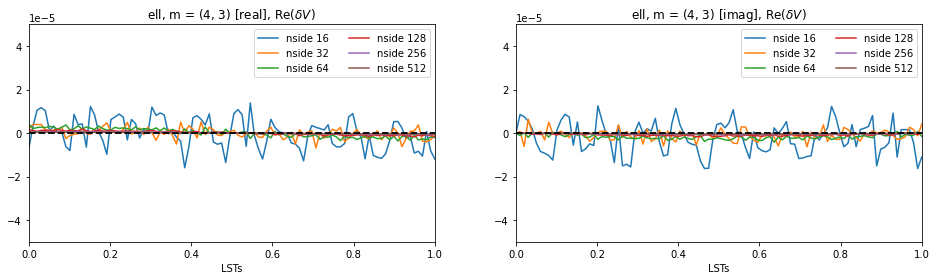

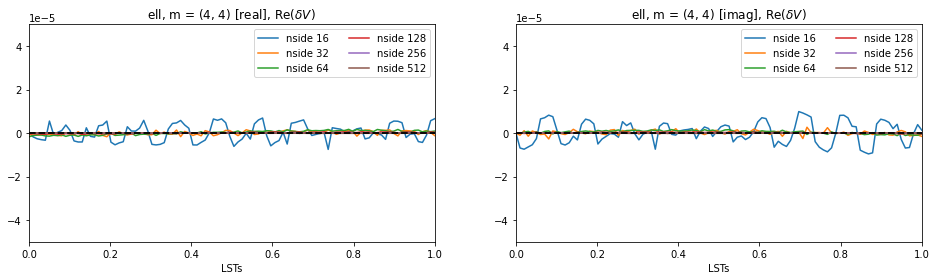

In [36]:
ant1, ant2 = 0, 1 # (0,0) is auto baseline, (0,1) is short baseline

# Plot particular mode vs LST
for idx in range(_ell.size):
    ax1, ax2 = plt.subplot(121), plt.subplot(122)
    for k, ax in enumerate([ax1, ax2]):
        ax.plot(lsts, vis_alm16[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 16")
        ax.plot(lsts, vis_alm32[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 32")
        ax.plot(lsts, vis_alm64[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 64")
        ax.plot(lsts, vis_alm128[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 128")
        ax.plot(lsts, vis_alm256[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 256")
        ax.plot(lsts, vis_alm512[0,:,ant1,ant2,idx + k*_ell.size].real, 
                 label="nside 512")
        
        ax.set_xlabel("LSTs")
        ax.set_xlim((0., 1.))
        ax.set_ylim((-5e-5, 5e-5))
        ax.legend(loc='upper right', ncol=2)
        ax.axhline(0., ls='dashed', color='k', lw=1.8)

    ax1.set_title("ell, m = (%d, %d) [real], Re($\delta V$)" % (ell[idx % ell.size], m[idx % ell.size]))
    ax2.set_title("ell, m = (%d, %d) [imag], Re($\delta V$)" % (ell[idx % ell.size], m[idx % ell.size]))

    plt.gcf().set_size_inches((16., 4.))
    plt.show()

## Plot healpix maps

In [11]:
lmax = 4
nside = 64

# Array of ell, m values in healpy ordering
_ell, _m = hp.Alm().getlm(lmax=lmax)

# Get Healpix pixel coords
npix = hp.nside2npix(nside)
pix_area = 4.*np.pi / npix # steradians per pixel
dec, ra = hp.pix2ang(nside=nside, ipix=np.arange(npix), lonlat=False)

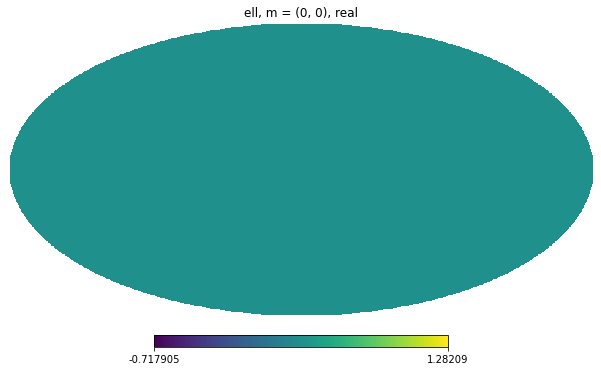

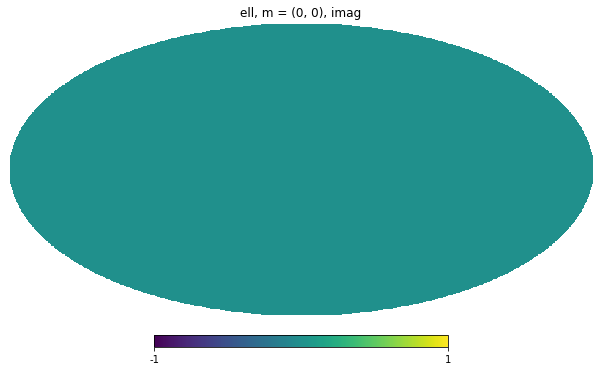

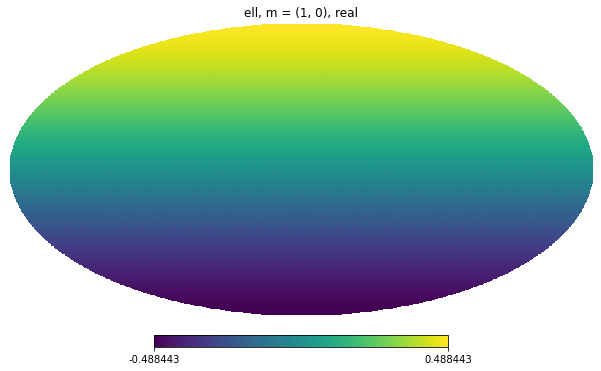

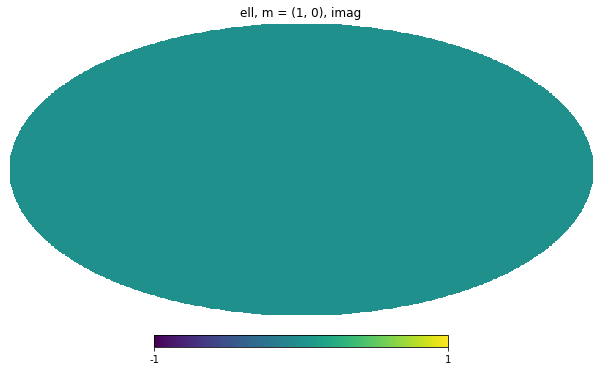

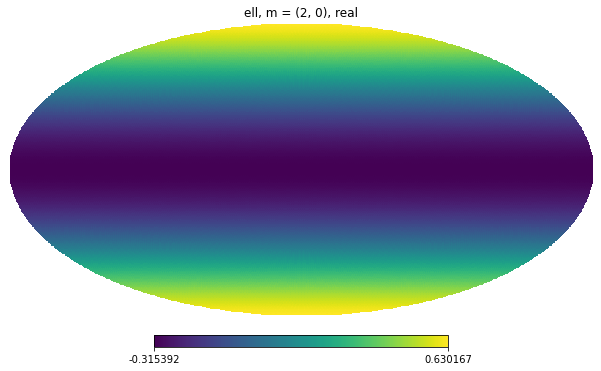

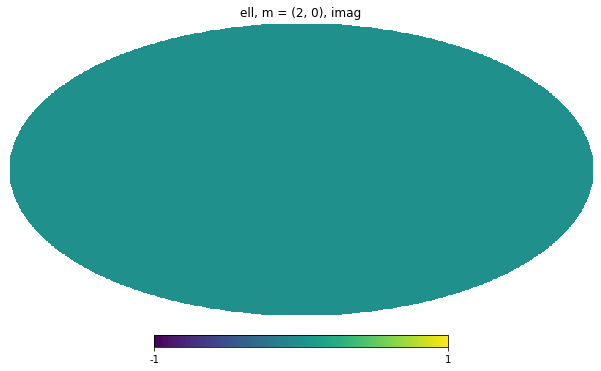

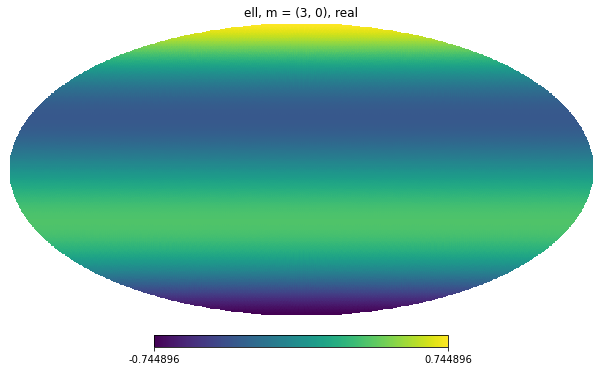

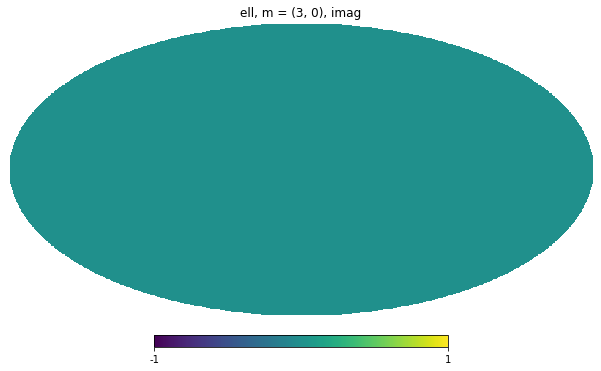

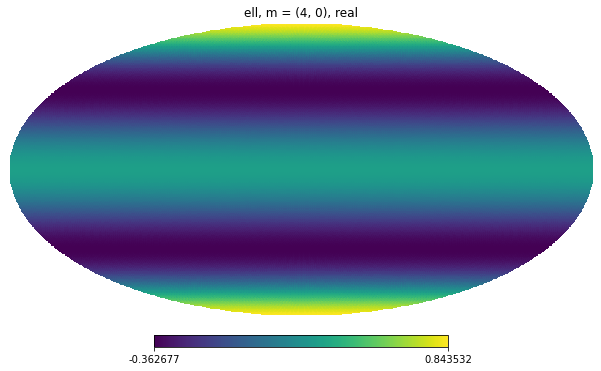

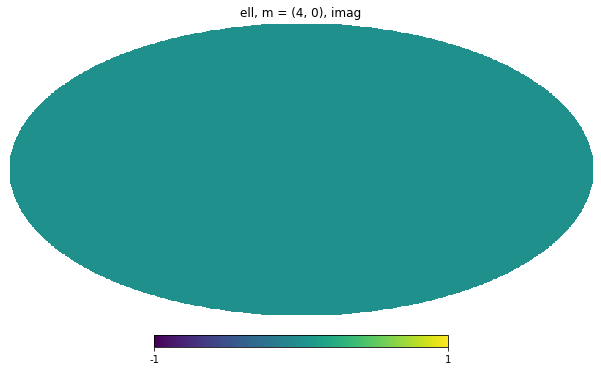

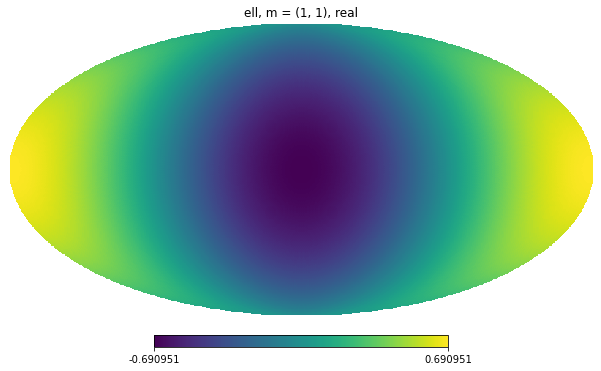

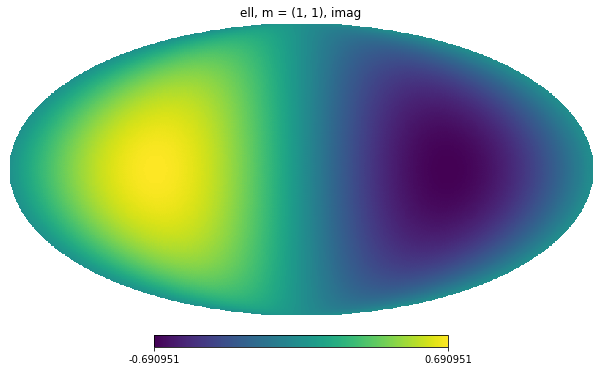

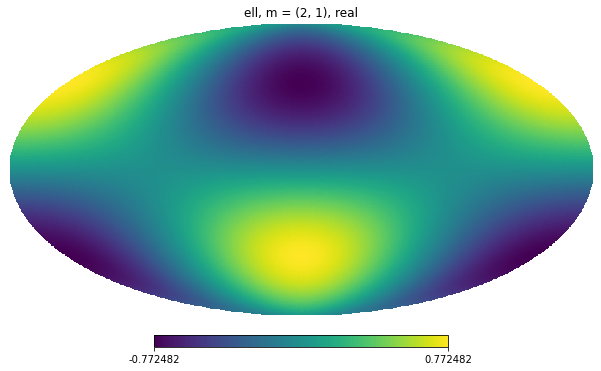

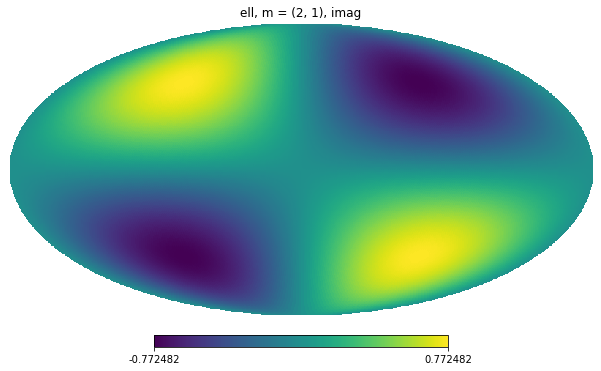

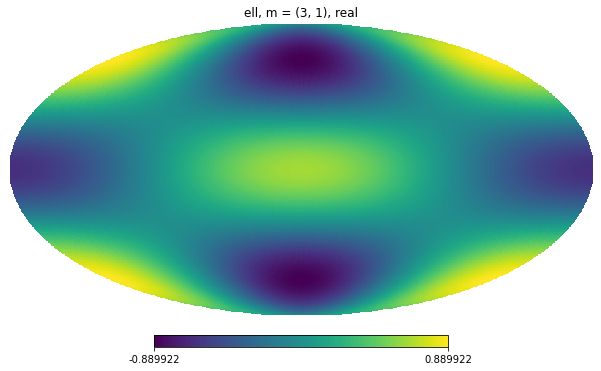

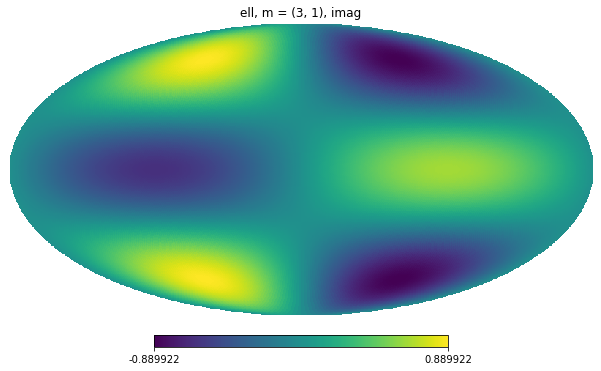

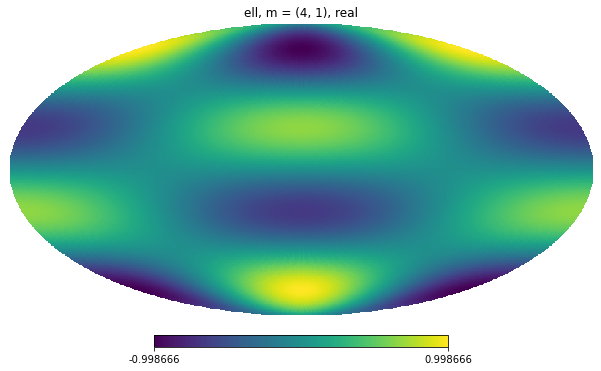

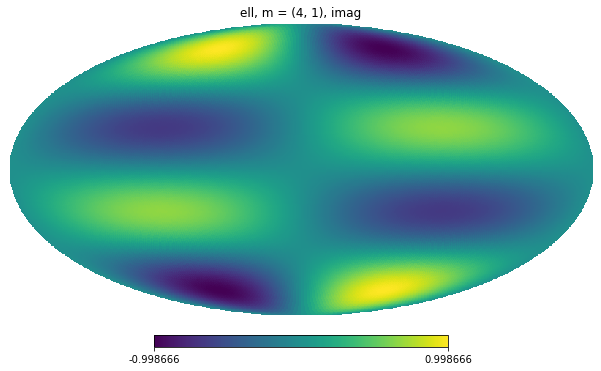

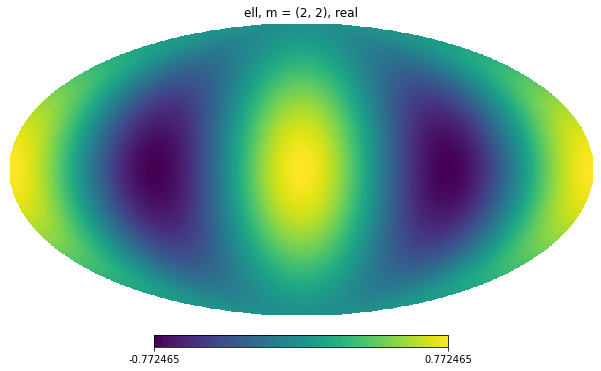

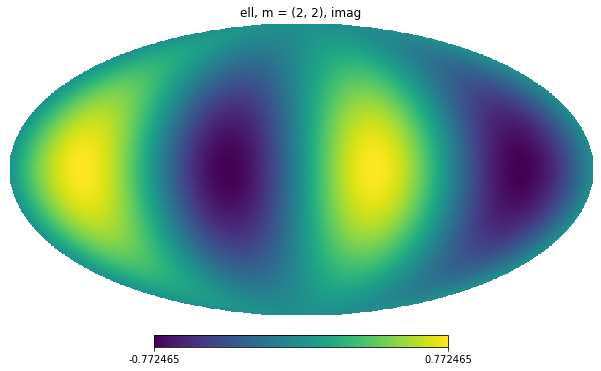

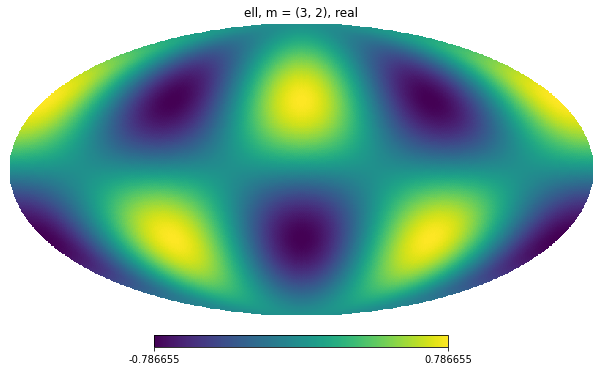

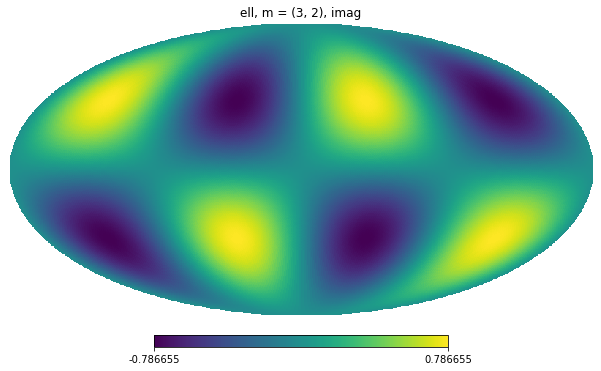

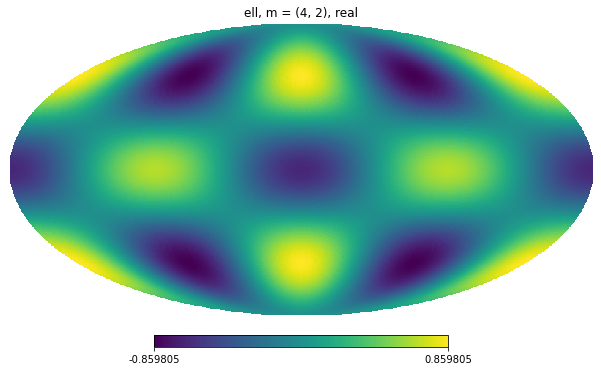

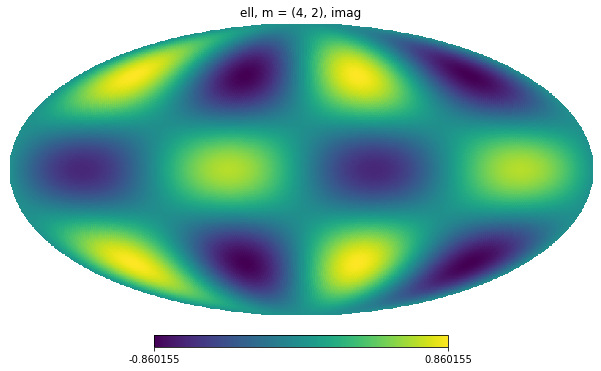

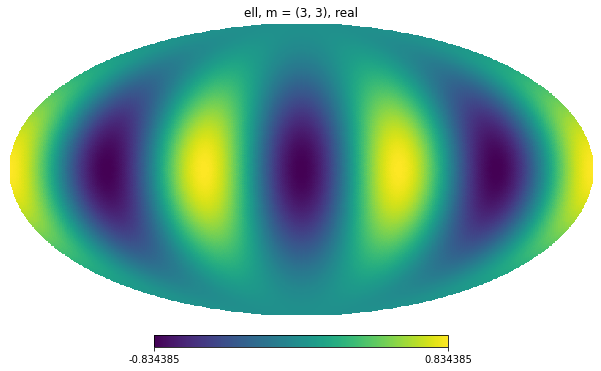

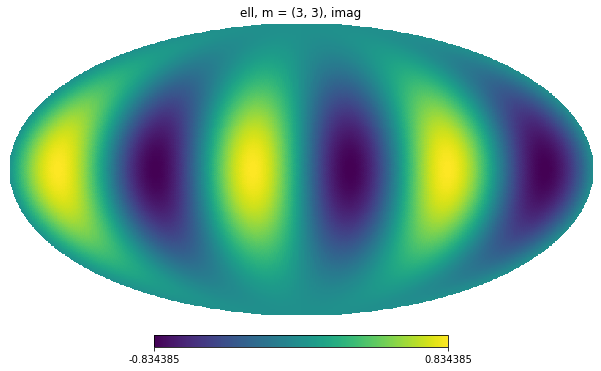

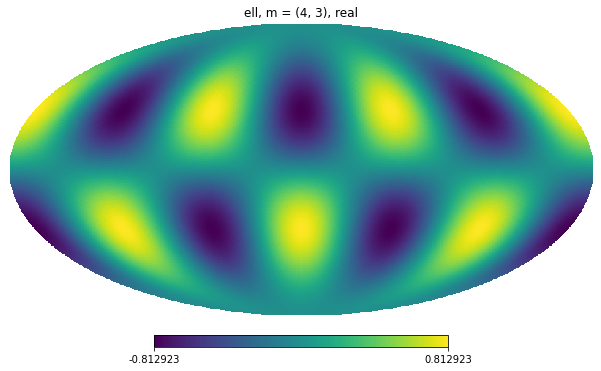

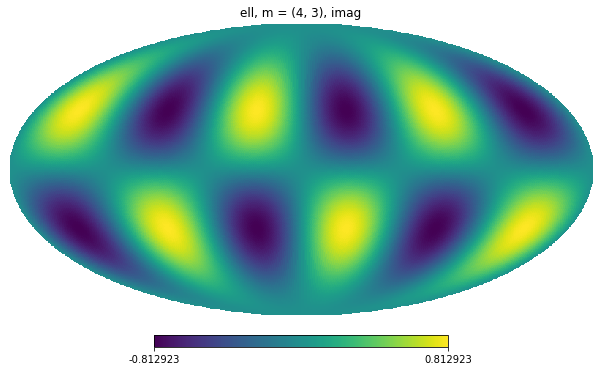

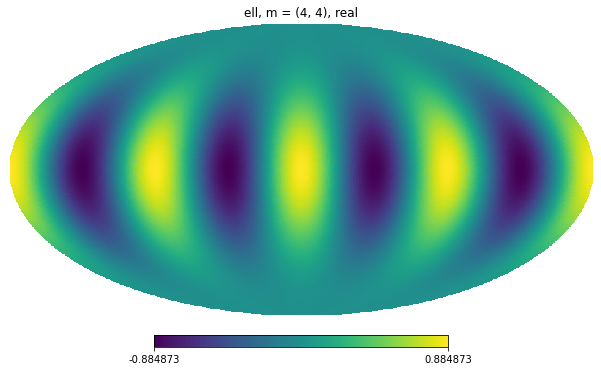

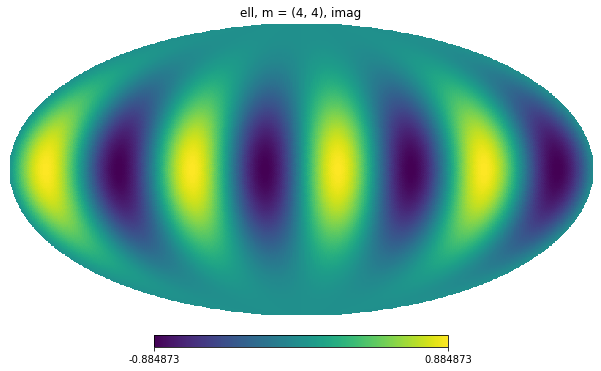

In [12]:
alm = np.zeros(_ell.size, dtype=np.complex128)
lbl = ['real', 'imag']
for n in range(_ell.size):

    # Start with zero vector for all modes
    alm *= 0

    # Loop over real, imaginary values for this mode only
    for j, val in enumerate([1., 1.j]):

        # Make healpix map for this mode only    
        alm[n] = val
        skymap = hp.alm2map(alm, nside=nside)
        hp.mollview(skymap, title="ell, m = (%d, %d), %s" % (_ell[n], _m[n], lbl[j]))
        plt.show()